In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales*

---

In [ ]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos
from scipy.integrate import trapezoid,simpson, quad
import math

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [ ]:
f = lambda x: (np.exp(3*x)) * np.sin(x)
g = lambda x: 1/(x*np.log10(x))

fliminf = 0

flimsup = np.pi/4

gliminf = 1e-6

glimsup = 1 + np.exp(1)

n = 500

xf = np.linspace(fliminf, flimsup, n+1)

xg = np.linspace(gliminf, glimsup, n+1)

fintegralsimpson = simpson(f(xf), xf)
fintegraltrapezoid = trapezoid(f(xf), xf)

fintegralquad = quad(f,fliminf,flimsup)[0]

gintegralsimpson = simpson(g(xg), xg)
gintegraltrapezoid = trapezoid(g(xg), xg)

gintegralquad = quad(g,gliminf,glimsup)[0]

print("Integral f(x) = e^{3x}·sin(x):")
print(f"  Simpson:    {fintegralsimpson}")
print(f"  Trapezoide: {fintegraltrapezoid}")
print(f"  Quad:       {fintegralquad}")

print("\nIntegral g(x) = 1/(x·log10(x)):")
print(f"  Simpson:    {gintegralsimpson}")
print(f"  Trapezoide: {gintegraltrapezoid}")
print(f"  Quad:       {gintegralquad}")

plt.loglog()

Integral f(x) = e^{3x}·sin(x):
  Simpson:    1.5920977078689023
  Trapezoide: 1.5921036382452418
  Quad:       1.5920977078586793

Integral g(x) = 1/(x·log10(x)):
  Simpson:    -414.78989529276026
  Trapezoide: -623.6796378023791
  Quad:       -7.970172419975176


/tmp/ipython-input-6-3577658336.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  gintegralquad = quad(g,gliminf,glimsup)[0]


/tmp/ipython-input-7-793621148.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I2_exact = quad(g, gliminf, glimsup)[0]


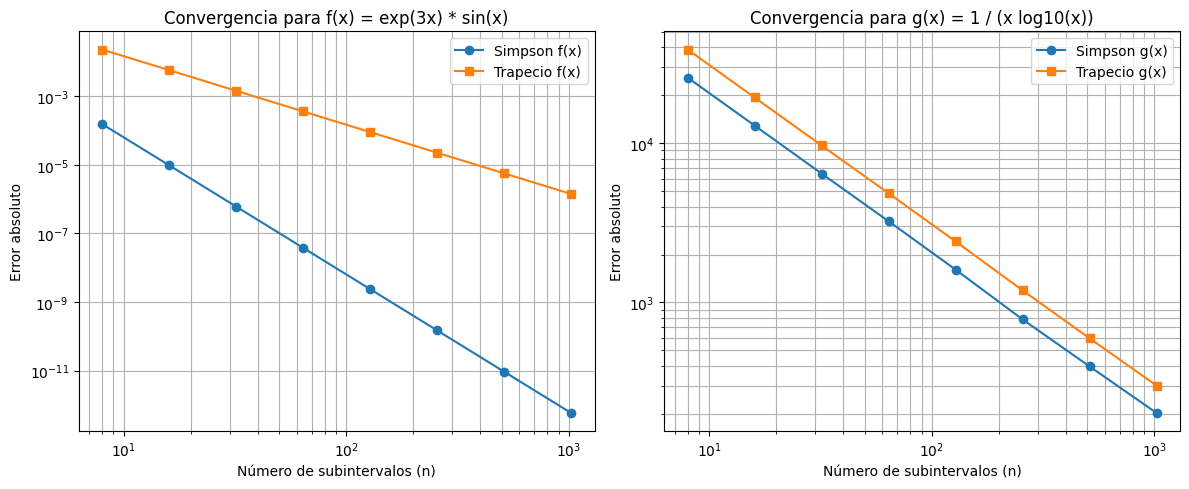

In [ ]:
I1_exact = quad(f, fliminf, flimsup)[0]
I2_exact = quad(g, gliminf, glimsup)[0]


n_values = 2 ** np.arange(3, 11)
errors_f_simp = []
errors_f_trap = []
errors_g_simp = []
errors_g_trap = []

for n in n_values:

    x1 = np.linspace(fliminf, flimsup, n+1)
    y1 = f(x1)
    err_simp_f = abs(simpson(y1, x1) - I1_exact)
    err_trap_f = abs(trapezoid(y1, x1) - I1_exact)
    errors_f_simp.append(err_simp_f)
    errors_f_trap.append(err_trap_f)


    x2 = np.linspace(gliminf, glimsup, n+1)
    y2 = g(x2)
    err_simp_g = abs(simpson(y2, x2) - I2_exact)
    err_trap_g = abs(trapezoid(y2, x2) - I2_exact)
    errors_g_simp.append(err_simp_g)
    errors_g_trap.append(err_trap_g)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.loglog(n_values, errors_f_simp, 'o-', label="Simpson f(x)")
plt.loglog(n_values, errors_f_trap, 's-', label="Trapecio f(x)")
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Error absoluto")
plt.title("Convergencia para f(x) = exp(3x) * sin(x)")
plt.grid(True, which="both")
plt.legend()


plt.subplot(1, 2, 2)
plt.loglog(n_values, errors_g_simp, 'o-', label="Simpson g(x)")
plt.loglog(n_values, errors_g_trap, 's-', label="Trapecio g(x)")
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Error absoluto")
plt.title("Convergencia para g(x) = 1 / (x log10(x))")
plt.grid(True, which="both")
plt.legend()

plt.tight_layout()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [ ]:
def integral1(y,x):
  f = lambda z: 1/y * np.sin(z/y)
  integrando = quad(f,0,x*y)
  return integrando
def inegral2(x):
  f = lambda y: integral1(y,x)
  integrando = quad(f,0,x)
  return integrando

integralquad, errorquad = quad(inegral2,0,np.pi)
integralquad
f = lambda z,y,x: 1/y * np.sin(z/y)
q = 0
r = lambda y,x: x*y
h = 0
g = lambda x: x
a = 0
b = np.sin
integraltlp = tlquad(f,a,b,h,g,q,r)[0]
print(f"La integral con quad es:{integralquad}, integral con tlpquad{integraltlp}")

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
def gauss_quad_extendida(func, n, a, b):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).
    - a: intervalo inferior
    - b: intervalo superior
    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x_i, w_i = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w_i * func(((b-a)/2)*x_i + ((b+a)/2)))
    valor_integral = (b-a)/2 * integral
    return valor_integral

#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
def f1(x):
    return np.sqrt(np.tan(x))

def trapecio_compuesto(f, a, b, tol):
    n = 2
    err = tol + 1
    integral_anterior = 0

    while err > tol:
        h = (b - a) / n
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = h * (y[0] + 2 * np.sum(y[1:-1]) + y[-1]) / 2
        err = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral, n, err

a1, b1 = np.pi/20, 1
I1_trap, n1_trap, err1_trap = trapecio_compuesto(f1, a1, b1, 1e-5)
print(f"Trapecio: I ≈ {I1_trap:.6f} con n={n1_trap}, error={err1_trap:.1e}")

def simpson_compuesto(f, a, b, tol):
    n = 2
    err = tol + 1
    integral_anterior = 0

    while err > tol:
        h = (b - a) / n
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = h/3 * (y[0] + 2*np.sum(y[2:-1:2]) + 4*np.sum(y[1::2]) + y[-1])
        err = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral, n, err

I1_simp, n1_simp, err1_simp = simpson_compuesto(f1, a1, b1, 1e-5)
print(f"Simpson: I ≈ {I1_simp:.6f} con n={n1_simp}, error={err1_simp:.1e}")

def gauss_legendre_2pts(f, a, b, n):

    x_i = [-1/np.sqrt(3), 1/np.sqrt(3)]
    w_i = [1, 1]

    h = (b - a) / n
    integral = 0
    for i in range(n):
        a_i = a + i * h
        b_i = a + (i + 1) * h
        for j in range(2):
            t = ((b_i - a_i)/2) * x_i[j] + (b_i + a_i)/2
            integral += w_i[j] * f(t) * (b_i - a_i)/2
    return integral


def gauss_adaptativo(f, a, b, tol):
    n = 2
    err = tol + 1
    integral_anterior = 0

    while err > tol:
        integral = gauss_legendre_2pts(f, a, b, n)
        err = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral, n, err

I1_gauss, n1_gauss, err1_gauss = gauss_adaptativo(f1, a1, b1, 1e-5)
print(f"Gaussiana: I ≈ {I1_gauss:.6f} con n={n1_gauss}, error={err1_gauss:.1e}")

In [ ]:
Tol = 1e-5


def trap_comp(f, a, b, n):
    h = (b - a) / n
    s = 0.5 * (f(a) + f(b)) + sum(f(a + k * h) for k in range(1, n))
    return s * h


def simpson_comp(f, a, b, n):

    if n % 2:
        raise ValueError("n debe ser par para Simpson")
    h = (b - a) / n
    s = f(a) + f(b)
    s += 4 * sum(f(a + h * (2 * k - 1)) for k in range(1, n // 2 + 1))
    s += 2 * sum(f(a + 2 * k * h) for k in range(1, n // 2))
    return s * h / 3


def gauss_legendre_interval(f, a, b):

    r = 1 / math.sqrt(3)
    nodes = (-r, r)
    return sum(f((b + a) / 2 + (b - a) / 2 * t) for t in nodes) * (b - a) / 2


def gauss_comp(f, a, b, n):

    h = (b - a) / n
    return sum(gauss_legendre_interval(f, a + i * h, a + (i + 1) * h)
               for i in range(n))



def refine(f, rule, a, b, tol=Tol):

    n = 2
    prev = rule(f, a, b, n)
    while True:
        n *= 2
        curr = rule(f, a, b, n)
        if abs(curr - prev) < tol:
            return curr, n
        prev = curr


f1 = lambda x: math.sqrt(math.tan(x))
a1, b1 = math.pi / 20, 1.0

I1_trap,  n1_trap  = refine(f1, trap_comp,    a1, b1)
I1_simp,  n1_simp  = refine(f1, simpson_comp, a1, b1)
I1_gauss, n1_gauss = refine(f1, gauss_comp,   a1, b1)


f2   = lambda x: math.cos(x) / x**3
tail = lambda B: 1 / (2 * B**2)


B2 = math.ceil(math.sqrt(1 / (2 * (Tol / 10))))

I2_trap_main,  n2_trap  = refine(f2, trap_comp,    1.0, B2, Tol / 2)
I2_simp_main,  n2_simp  = refine(f2, simpson_comp, 1.0, B2, Tol / 2)
I2_gauss_main, n2_gauss = refine(f2, gauss_comp,   1.0, B2, Tol / 2)

I2_trap  = I2_trap_main  + tail(B2)
I2_simp  = I2_simp_main  + tail(B2)
I2_gauss = I2_gauss_main + tail(B2)

g = lambda x: 0.5 * (x + math.sin(x) * math.cos(x))

a3, b3 = 0.0, math.pi / 4
I3_trap,  n3_trap  = refine(g, trap_comp,    a3, b3)
I3_simp,  n3_simp  = refine(g, simpson_comp, a3, b3)
I3_gauss, n3_gauss = refine(g, gauss_comp,   a3, b3)

print("Integral  $√(tan x)  de π/20 a 1$")
print(f"  Trapecio: I ≈ {I1_trap:.8f}   (n = {n1_trap})")
print(f"  Simpson : I ≈ {I1_simp:.8f}   (n = {n1_simp})")
print(f"  Gauss   : I ≈ {I1_gauss:.8f}   (n = {n1_gauss})\n")

print("Integral  $cos x / x³  de 1 a ∞$")
print(f"  Trapecio: I ≈ {I2_trap:.8f}   (n = {n2_trap})")
print(f"  Simpson : I ≈ {I2_simp:.8f}   (n = {n2_simp})")
print(f"  Gauss   : I ≈ {I2_gauss:.8f}   (n = {n2_gauss})\n")

print("Integral  doble $√(1−y²)$ ")
print(f"  Trapecio: I ≈ {I3_trap:.8f}   (n = {n3_trap})")
print(f"  Simpson : I ≈ {I3_simp:.8f}   (n = {n3_simp})")
print(f"  Gauss   : I ≈ {I3_gauss:.8f}   (n = {n3_gauss})")